In [66]:
# For data management
import pandas as pd
import numpy as np


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'en_core_web_trf'

In [ ]:
df = pd.read_csv('C:/Users/Y/Documents/GitHub/-Project-Song-Vibe/data/music_data.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
df.isnull().sum()
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [ ]:
'''
selected_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings']

X = df[selected_features]

y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)'''

"\nselected_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings']\n\nX = df[selected_features]\n\ny = df['genre']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)\n\nprint('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)"

C:\Users\Y\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


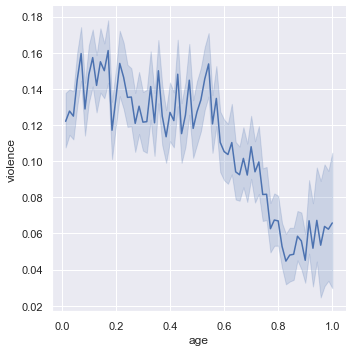

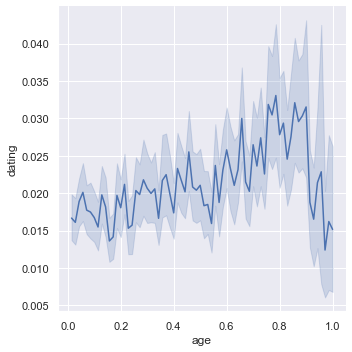

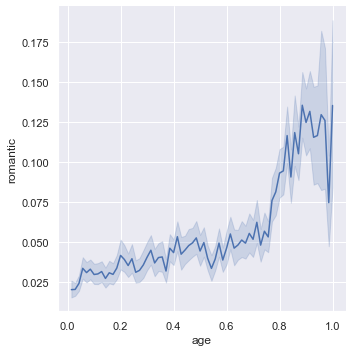

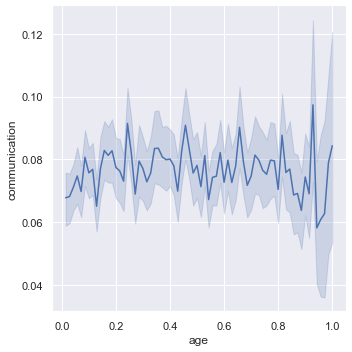

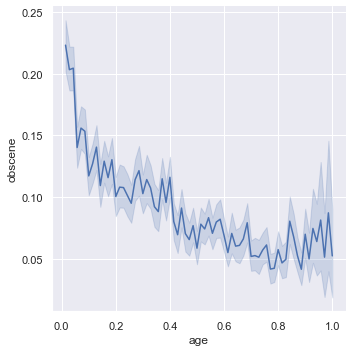

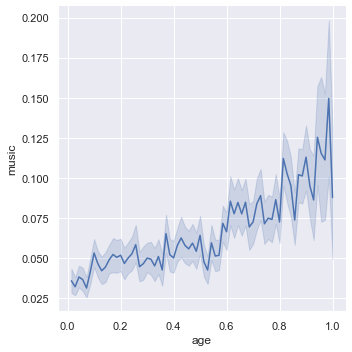

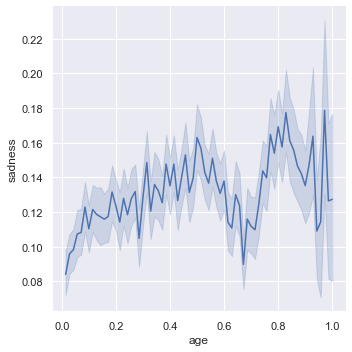

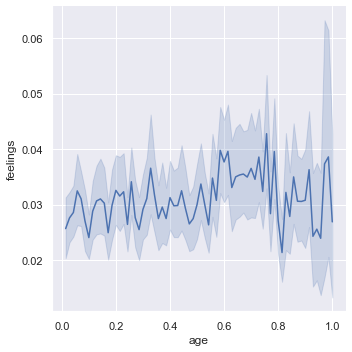

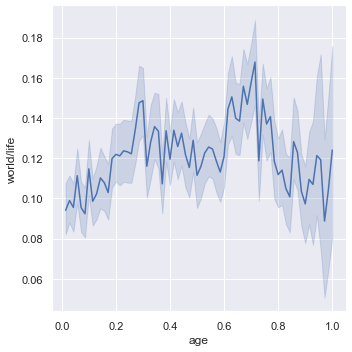

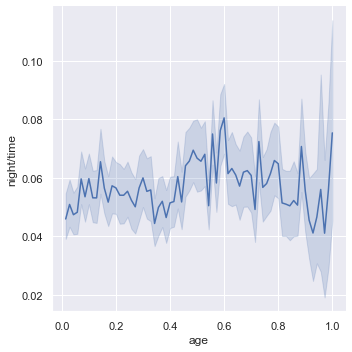

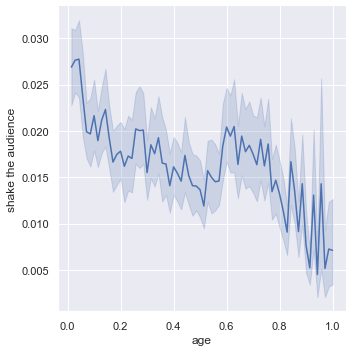

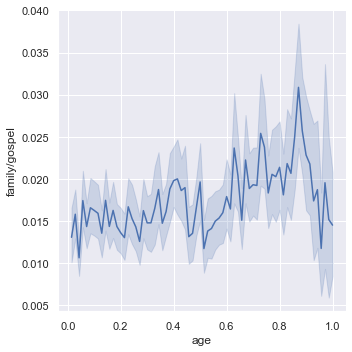

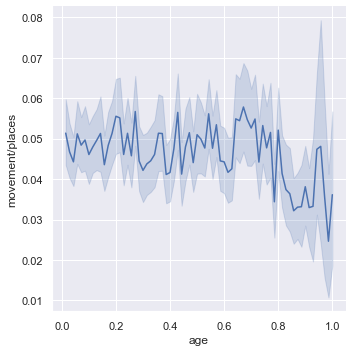

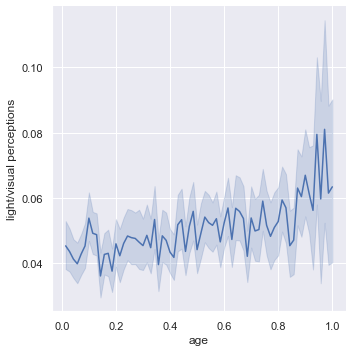

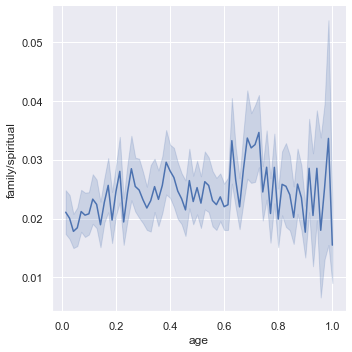

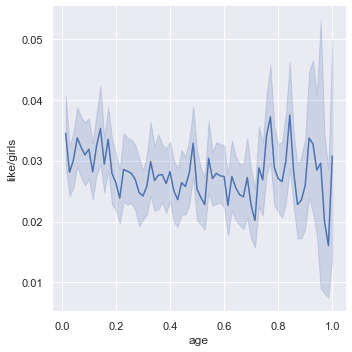

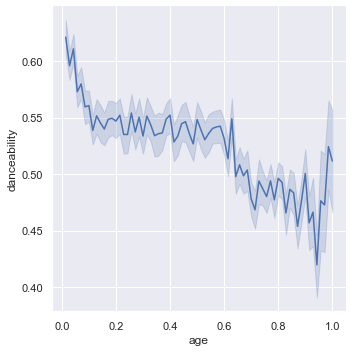

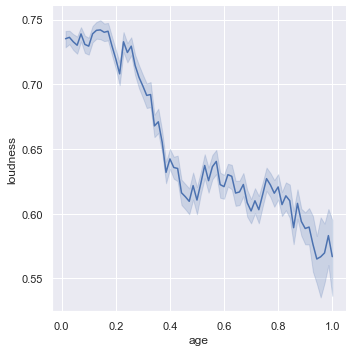

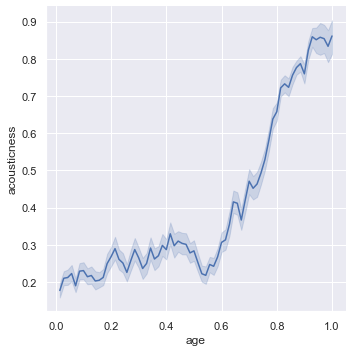

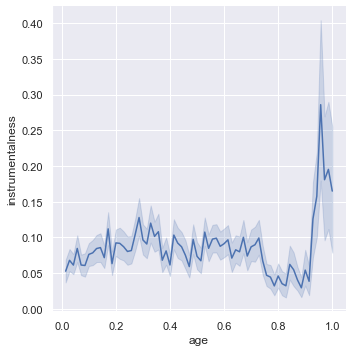

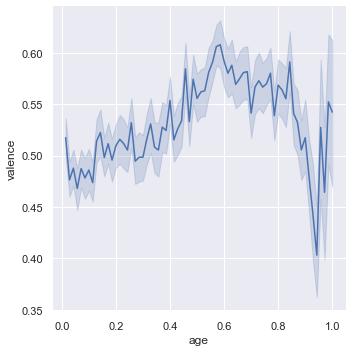

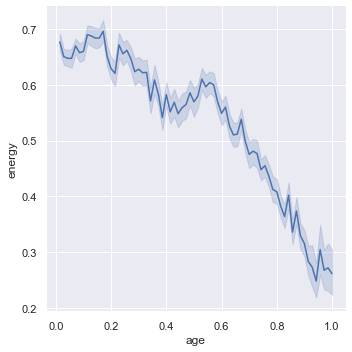

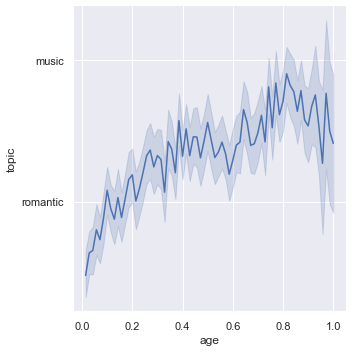

In [ ]:
'''/all_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings',
               'world/life', 'night/time', 'shake the audience', 'family/gospel', 'movement/places', 'light/visual perceptions',
               'family/spiritual', 'like/girls', 'danceability', 'loudness', 'acousticness', 'instrumentalness',
               'valence', 'energy', 'topic']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'age', kind = 'line', height = 5, aspect = 1)
'''

In [ ]:
selected_features = ['romantic', 'obscene', 'violence', 'music', 'shake the audience', 'loudness', 'acousticness', 'energy']

In [ ]:
target = ['age']
# Define your X and y variables
X = df[selected_features].values

# 
y = df[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:

# Initalize our model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.56193119],
       [0.27454903],
       [0.54594498],
       ...,
       [0.32223891],
       [0.41508512],
       [0.27295524]])

In [ ]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.3125399730517754


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1808411893092081


In [ ]:
# GET THE COEFFICIENT VALUES FROM THE MODEL
coefficient_values = model.coef_

# MAKE A DATA FRAME OUT OF THE VALUES AND THEIR COLUMN NAMES
df_coefficients = pd.DataFrame(coefficient_values, columns=selected_features).T

# RENAME THE COLUMN FROM 0 TO COEFFICIENT
df_coefficients.columns = ['coefficient']

# DISPLAY THE DATA FRAME
df_coefficients

,coefficient
romantic,0.191042
obscene,-0.173285
violence,-0.100254
music,0.081470
shake the audience,-0.073707
loudness,-1.046504
acousticness,0.254839
energy,0.249129


In [ ]:
import pickle

filename = 'compare.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(vectorizer, open('C:/Users/Y/Documents/GitHub/-Project-Song-Vibe/models/compare.pkl', 'wb'))